In [1]:
# Voy a realizar algunos Análisis Exploratorio de Datos (EDA) 

In [2]:
# Importo las librerias que me brinda Python.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
import seaborn as sns
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
# Realizo la importación de los datos.

df = pd.read_csv('heladeras.csv', encoding='latin1')
df.head()

,ID,Título,Precio,Precio Original,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1281067393,Heladera Drean Hdr280f00 Blanca Con Freezer 26...,486499.0,599999.0,new,500,Drean,False
1,MLA1411979302,Heladera Con Freezer 314 Lts Black Steel Drean...,668683.0,823999.0,new,1,Drean,False
2,MLA1281028998,Heladera Con Freezer Cíclica 362 Lts Gris Drea...,709877.0,902999.0,new,1,Drean,False
3,MLA1629449430,Heladera Samsung Rt29k507js8 Invert 308lts Ino...,775799.0,NaN,new,1,Samsung,False
4,MLA1307091794,Heladera Con Freezer Cíclica 314 Lts Gris Drea...,647999.0,733599.0,new,100,Drean,False


In [4]:
# Realizo la función shape para comprobar los registros y columnas de mi dataset. 

df.shape

(150, 8)

In [5]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [6]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

ID                     False
Título                 False
Precio                 False
Precio Original         True
Condición              False
Cantidad disponible    False
Marca                  False
Envío gratuito         False
dtype: bool

In [7]:
# únicamente tuve valores null en la columna Precio Original, por lo que decido eliminarla para simplificar de manera resolutiva.

df.drop(["Precio Original"], axis = 1, inplace = True)
df.head()

,ID,Título,Precio,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1281067393,Heladera Drean Hdr280f00 Blanca Con Freezer 26...,486499.0,new,500,Drean,False
1,MLA1411979302,Heladera Con Freezer 314 Lts Black Steel Drean...,668683.0,new,1,Drean,False
2,MLA1281028998,Heladera Con Freezer Cíclica 362 Lts Gris Drea...,709877.0,new,1,Drean,False
3,MLA1629449430,Heladera Samsung Rt29k507js8 Invert 308lts Ino...,775799.0,new,1,Samsung,False
4,MLA1307091794,Heladera Con Freezer Cíclica 314 Lts Gris Drea...,647999.0,new,100,Drean,False


In [8]:
# Constato que ahora no se encuentran valores null en el dataset.

df.isnull().values.any()

False

In [9]:
# Analizaré los datos que tienen que ver con las Marcas de heladeras.
# Calculo el promedio de cada Marca de Heladera según su valor Precio. 
promedio_por_marca = df.groupby("Marca")["Precio"].mean()

# Defino una función para formatear los números
def formato_precio(numero):
    return f"${numero:,.2f}"  # Agrega separadores de miles y dos decimales

# Aplico la función de formato a la Serie 'promedio_por_marca'
promedio_por_marca_formateado = promedio_por_marca.map(formato_precio)

# Muestro el resultado formateado
print("Promedio por Marca:")
print(promedio_por_marca_formateado)

Promedio por Marca:
Marca
Ariston            $1,256,319.00
Bambi                $543,991.20
Bosch              $3,399,999.00
Briket               $520,283.61
Candy              $1,927,999.00
Columbia             $775,534.50
Conqueror            $663,771.00
Drean                $801,452.50
Electrolux           $901,499.50
Eslabón de Lujo      $522,999.00
Gafa                 $746,873.71
Hisense            $1,442,324.00
Kanji                $359,999.00
Koh-i-noor         $1,267,458.28
LG                 $1,699,999.00
Lacar                $419,203.40
Midea              $2,115,960.00
Neba                 $547,572.60
Peabody            $1,915,999.00
Philco               $876,727.38
Samsung            $1,761,929.00
Siam                 $547,719.00
Telefunken           $477,951.03
Ultracomb            $472,274.71
Unnic                $412,999.00
Vondom               $810,000.00
Vostok               $849,267.33
Whirlpool          $1,515,528.92
Name: Precio, dtype: object


In [10]:
# Calculo el porcentaje representativo de cada Marca de Heladera.

# Elimino el símbolo de dólar y convierto las cadenas en números
promedio_por_marca_numerico = promedio_por_marca_formateado.replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculo el total
total = promedio_por_marca_numerico.sum()

# Calculo el porcentaje representativo de cada marca de heladera
porcentaje_por_marca = (promedio_por_marca_numerico / total) * 100

# Muestro el resultado
print("\nPorcentaje por Marca:\n", porcentaje_por_marca)


Porcentaje por Marca:
 Marca
Ariston             4.250980
Bambi               1.840691
Bosch              11.504504
Briket              1.760473
Candy               6.523729
Columbia            2.624160
Conqueror           2.245988
Drean               2.711858
Electrolux          3.050385
Eslabón de Lujo     1.769661
Gafa                2.527181
Hisense             4.880361
Kanji               1.218121
Koh-i-noor          4.288672
LG                  5.752250
Lacar               1.418450
Midea               7.159729
Neba                1.852810
Peabody             6.483125
Philco              2.966564
Samsung             5.961802
Siam                1.853305
Telefunken          1.617233
Ultracomb           1.598026
Unnic               1.397456
Vondom              2.740780
Vostok              2.873648
Whirlpool           5.128063
Name: Precio, dtype: float64


In [11]:
# Determino cual es la Marca con mayor porcentaje de todos.

tipo_mayor = porcentaje_por_marca.idxmax()
print("\nTipo con mayor porcentaje:", tipo_mayor)


Tipo con mayor porcentaje: Bosch


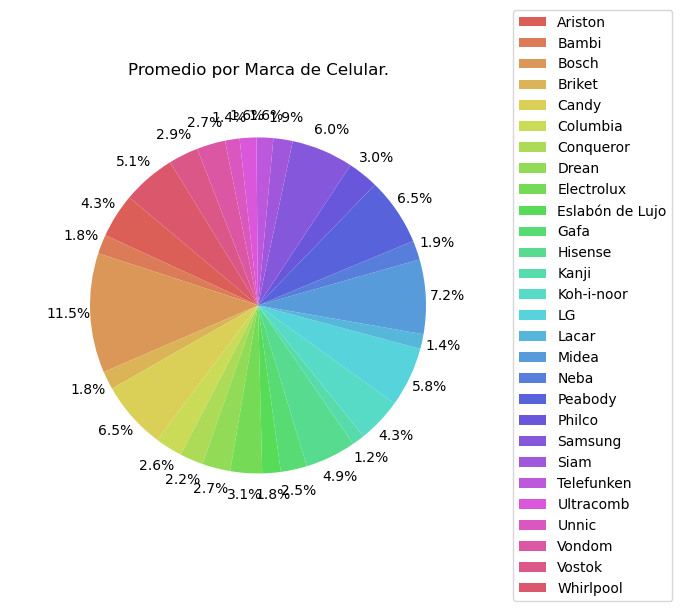

In [14]:
# Vuelco los valores en un gráfico representativo.


# Obtengo una lista de 23 colores distintos de la paleta de colores de Seaborn
colores = sns.color_palette('hls', n_colors=28)

# Vuelco los valores en un gráfico representativo.
plt.pie(porcentaje_por_marca, colors=colores, autopct='%1.1f%%', startangle=140, pctdistance=1.13)
plt.axis('equal')
plt.title('Promedio por Marca de Heladera.', y=1.1)  # Mover el título hacia arriba

# Mostrar leyenda con etiquetas y colores al costado del gráfico
plt.legend(porcentaje_por_marca.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [15]:
# Para los datos de las heladeras con Envío gratuito.
# Cuento la cantidad de ocurrencias de cada valor en la columna "Envío gratuito"
# Obtengo el porcentaje de Heladeras con Envío gratuito.

envio_gratuito_counts = df['Envío gratuito'].value_counts()
percentage_envio_gratuito = (envio_gratuito_counts[True] / len(df)) * 100

print(f"Porcentaje de Heladeras con Envio gratuito: {percentage_envio_gratuito:.1f}%")

Porcentaje de Heladeras con Envio gratuito: 9.3%


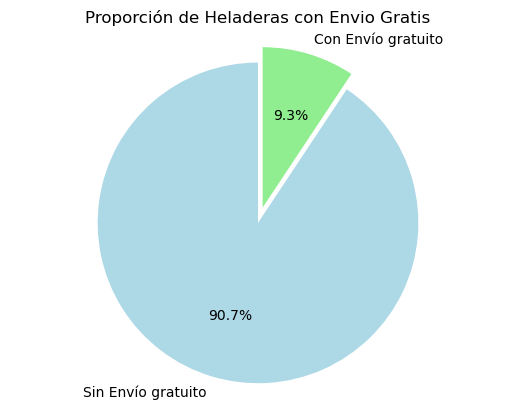

In [17]:
# Cuento la cantidad de ocurrencias de cada valor en la columna "Envío gratuito"
# Defino los datos para el gráfico circular

envio_gratuito_counts = df['Envío gratuito'].value_counts()
fig, ax = plt.subplots()
labels = ['Sin Envío gratuito', 'Con Envío gratuito']
sizes = [envio_gratuito_counts[False], envio_gratuito_counts[True]]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1) 

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proporción de Heladeras con Envio Gratis')
plt.show()

In [40]:
# Ahora trabajaré con un valor agregado de clasificación para mis datos.
# Decido crear un concepto nuevo denominado Calificación partiendo de los valores de precio y etiquetándolos según un criterio.

df['Calificación'] = pd.cut(df.Precio, bins=[0,800000 ,1600000, 2200000 ,float('inf')], labels=['Barato','Moderado','Caro','Premium'])

In [28]:
# Noto que ya se reconoce a Calificación como una columna más.

df[['Marca','Calificación','Precio']].shape

(150, 3)

In [41]:
# Obtengo la cantidad de registros por Calificación

df.Calificación.value_counts()

Calificación
Barato      78
Moderado    47
Caro        18
Premium      7
Name: count, dtype: int64

In [42]:
# Outliers normalizados. 

df.Calificación.value_counts(normalize=True)

Calificación
Barato      0.520000
Moderado    0.313333
Caro        0.120000
Premium     0.046667
Name: proportion, dtype: float64

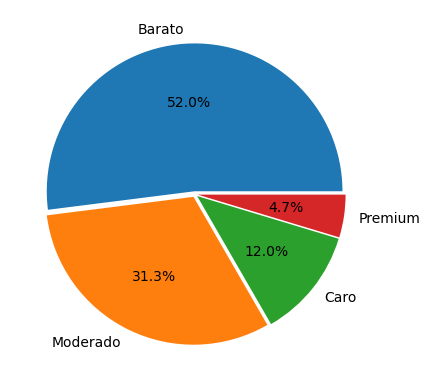

In [43]:
# Guardo los valores en una variable
calificacion_counts = df.Calificación.value_counts(normalize=True)

# Grafico el conteo de cada categoría en un gráfico de pastel
explode = [0.02] * len(calificacion_counts)
calificacion_counts.plot.pie(autopct='%1.1f%%', ylabel='', explode=explode)
plt.show()

In [44]:
# Obtengo el total de la suma de sus Precios.

df.groupby(['Calificación'])['Precio'].sum()

Calificación
Barato      42097780.25
Moderado    51513085.45
Caro        34310205.00
Premium     22633993.00
Name: Precio, dtype: float64

In [45]:
# Determino la media 
media_precios_por_calificacion = df.groupby(['Calificación'])['Precio'].mean()

# Aplicar la función de formato a cada número de la media de precios
media_precios_por_calificacion_formateada = media_precios_por_calificacion.apply(formato_precio)

# Mostrar los resultados
print(media_precios_por_calificacion_formateada)

Calificación
Barato        $539,715.13
Moderado    $1,096,023.09
Caro        $1,906,122.50
Premium     $3,233,427.57
Name: Precio, dtype: object


In [46]:
# Decido agrupar mis datos por Marca y ver la suma de sus precios.

# Agrupar por marca
datos_agrupados_marca = df.groupby('Marca')

# Obtener la suma de precios por marca
suma_precios_marca = datos_agrupados_marca['Precio'].sum()

# Mostrar la suma de precios por marca
print("Suma de precios por marca:")
print(suma_precios_marca)

Suma de precios por marca:
Marca
Ariston             6281595.00
Bambi               2719956.00
Bosch               3399999.00
Briket              2601418.05
Candy               1927999.00
Columbia            1551069.00
Conqueror           1991313.00
Drean              17631955.00
Electrolux          1802999.00
Eslabón de Lujo      522999.00
Gafa                5228116.00
Hisense             5769296.00
Kanji                359999.00
Koh-i-noor          6337291.40
LG                  1699999.00
Lacar               2096017.00
Midea               4231920.00
Neba                2737863.00
Peabody             1915999.00
Philco             14027638.00
Samsung            31714722.05
Siam                2738595.00
Telefunken          2867706.20
Ultracomb           3305923.00
Unnic                412999.00
Vondom              2430000.00
Vostok              2547802.00
Whirlpool          19701876.00
Name: Precio, dtype: float64


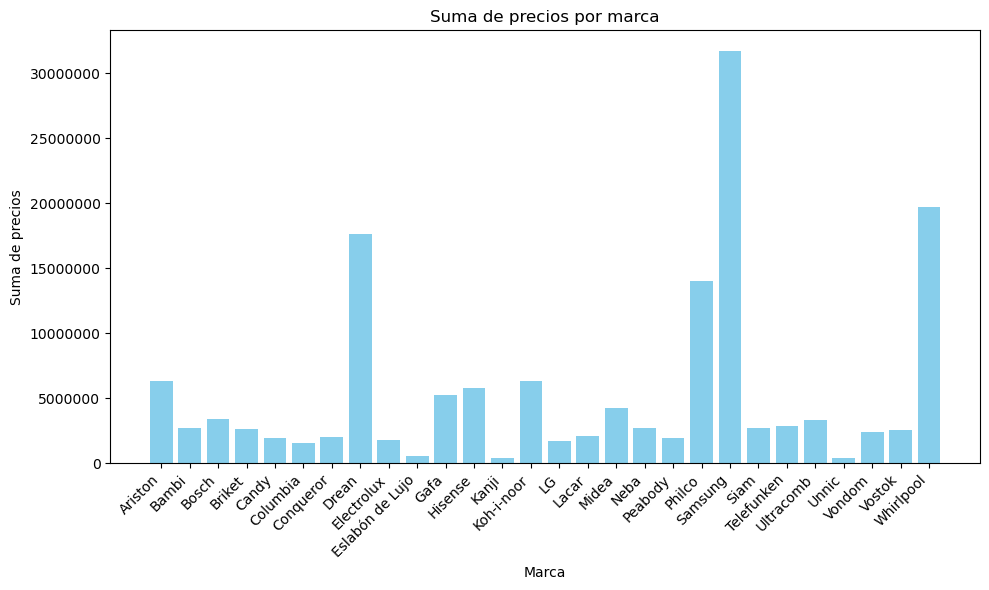

In [52]:
# Creo el gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
barras = plt.bar(suma_precios_marca.index, suma_precios_marca, color='skyblue')  # Crear barras con color azul celeste

# Personalizo el gráfico
plt.xlabel('Marca')
plt.ylabel('Suma de precios')
plt.title('Suma de precios por marca')
plt.xticks(rotation=45, ha='right')  # Rotar y alinear las etiquetas de marca
plt.ticklabel_format(style='plain', axis='y')  # Mostrar números completos en el eje y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Regresión Logística - Clasificación

# A diferencia de la regresión lineal donde se predice un valor continuo, se utiliza la regresión logística se utiliza para predecir una variable categórica binaria o multiclase.
# En lugar de predecir valores numéricos como en la regresión lineal, la regresión logística estima la probabilidad de que una instancia pertenezca a una determinada clase. 
# Esto se logra utilizando una función logística, también conocida como función sigmoide, que transforma una combinación lineal de las variables de entrada en un valor comprendido entre 0 y 1.

In [53]:
# Importo las librerias que me brinda Python.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
import warnings

In [54]:
# Realizo la importación de los datos.

df = pd.read_csv('heladeras.csv', encoding='latin1')
df.head()

,ID,Título,Precio,Precio Original,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1281067393,Heladera Drean Hdr280f00 Blanca Con Freezer 26...,486499.0,599999.0,new,500,Drean,False
1,MLA1411979302,Heladera Con Freezer 314 Lts Black Steel Drean...,668683.0,823999.0,new,1,Drean,False
2,MLA1281028998,Heladera Con Freezer Cíclica 362 Lts Gris Drea...,709877.0,902999.0,new,1,Drean,False
3,MLA1629449430,Heladera Samsung Rt29k507js8 Invert 308lts Ino...,775799.0,NaN,new,1,Samsung,False
4,MLA1307091794,Heladera Con Freezer Cíclica 314 Lts Gris Drea...,647999.0,733599.0,new,100,Drean,False


In [55]:
# Para este analisis tomaré los valores de Precio para la variable X independiente.
# Y los valores de Envío gratuito para la variable Y dependiente.

In [56]:
# Coloco los datos de las columnas Precio en la variable X.
# Coloco los datos de la columna Envío gratuito en la variable y.

X = df.iloc[:, 2].values 
y = df.iloc[:, 7].values
X,y

(array([ 486499.  ,  668683.  ,  709877.  ,  775799.  ,  647999.  ,
         306999.  ,  796097.  ,  815759.  ,  594431.  ,  399768.  ,
        1151966.  , 1039422.  ,  701902.  , 5291999.  ,  519990.  ,
         947999.  , 1720999.  ,  487799.1 ,  574999.  , 2419999.  ,
         999999.  , 1724399.  ,  552999.  ,  799999.  ,  437028.  ,
         831743.  ,  357999.  ,  284426.  , 1436999.  ,  455082.  ,
         389999.  ,  499999.  ,  371105.  , 1038999.  ,  617600.  ,
         478012.  , 2120999.  , 1054999.  ,  522999.  , 1379999.  ,
        1959999.  ,  991999.  ,  704999.  ,  699999.  ,  418637.1 ,
         960214.  ,  469599.  ,  489912.  ,  585337.  , 1199999.  ,
         275999.  ,  555999.  , 1874999.  ,  248999.  ,  999999.  ,
         899899.  , 1699999.  ,  495000.  ,  341168.  ,  517999.  ,
         480000.  ,  939999.  ,  632499.  ,  549999.  , 2999999.  ,
         529999.  , 1598999.  , 1820199.  ,  803000.  , 2347999.  ,
         882278.  ,  959999.  ,  390000.  , 2100

In [57]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [58]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([ 486499.  ,  668683.  ,  709877.  ,  775799.  ,  647999.  ,
         306999.  ,  796097.  ,  815759.  ,  594431.  ,  399768.  ,
        1151966.  , 1039422.  ,  701902.  , 5291999.  ,  519990.  ,
         947999.  , 1720999.  ,  487799.1 ,  574999.  , 2419999.  ,
         999999.  , 1724399.  ,  552999.  ,  799999.  ,  437028.  ,
         831743.  ,  357999.  ,  284426.  , 1436999.  ,  455082.  ,
         389999.  ,  499999.  ,  371105.  , 1038999.  ,  617600.  ,
         478012.  , 2120999.  , 1054999.  ,  522999.  , 1379999.  ,
        1959999.  ,  991999.  ,  704999.  ,  699999.  ,  418637.1 ,
         960214.  ,  469599.  ,  489912.  ,  585337.  , 1199999.  ,
         275999.  ,  555999.  , 1874999.  ,  248999.  ,  999999.  ,
         899899.  , 1699999.  ,  495000.  ,  341168.  ,  517999.  ,
         480000.  ,  939999.  ,  632499.  ,  549999.  , 2999999.  ,
         529999.  , 1598999.  , 1820199.  ,  803000.  , 2347999.  ,
         882278.  ,  959999.  ,  390000.  , 2100

In [66]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [68]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

from sklearn.preprocessing import StandardScaler

# Escala los datos (variables)
sc_X = StandardScaler()

# Reformatea X_train si es necesario
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 1)

X_train = sc_X.fit_transform(X_train)

# Reformatea X_test si es necesario
if len(X_test.shape) == 1:
    X_test = X_test.reshape(-1, 1)

X_test = sc_X.transform(X_test)

In [69]:
# Ajusto el modelo de clasificación con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [70]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0],
       [ 3,  0]], dtype=int64)

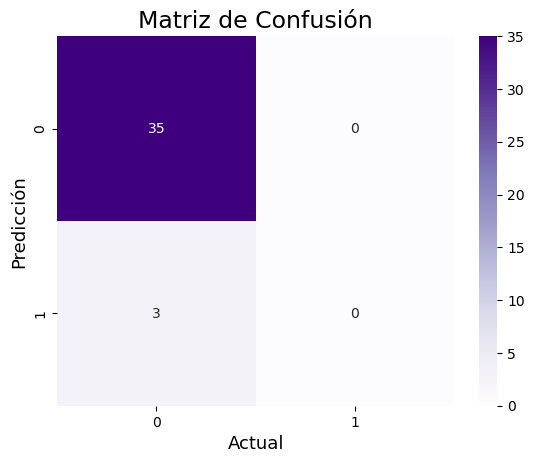

In [71]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [72]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [ ]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 35 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 0 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 3 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 0 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un gran numero de predicciones calificadas como correctas para la clase 0, y pocos casos clasificados incorrectos.
# Además en el caso de el cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Esto podriamos considerarlo como un buen primer indicio del modelo.

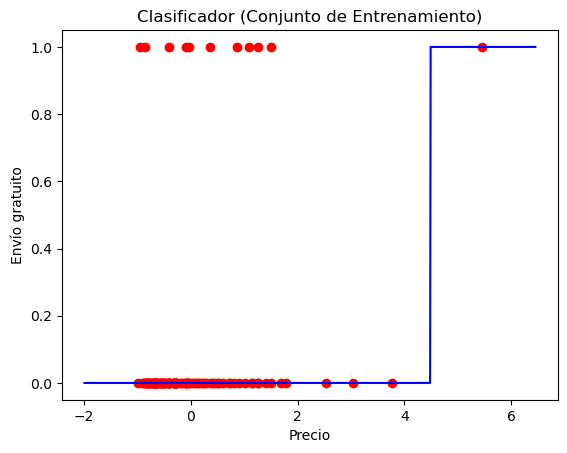

In [75]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

from matplotlib.colors import ListedColormap

# Solo se tiene una variable en X, por lo que no es necesario crear una malla bidimensional
X_set, y_set = X_train, y_train

# Crear un array de valores para la variable única
X_values = np.arange(start = X_set.min() - 1, stop = X_set.max() + 1, step = 0.01)

# Graficar la función de decisión del clasificador
plt.plot(X_values, classifier.predict(X_values.reshape(-1, 1)), color = 'blue')

# Graficar los puntos de datos del conjunto de entrenamiento
plt.scatter(X_set, y_set, color = 'red')

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Precio')
plt.ylabel('Envío gratuito')
plt.show()

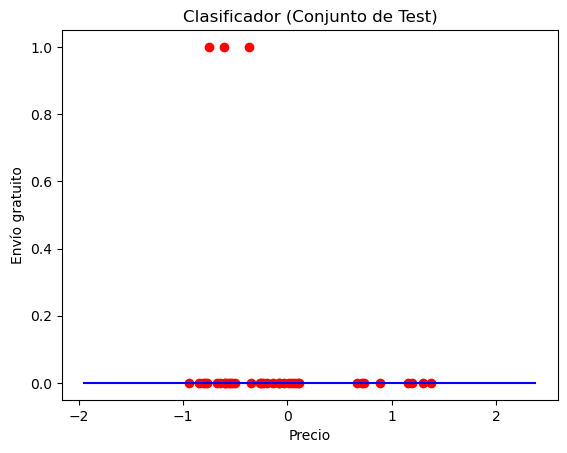

In [76]:
# Visualización del modelo de clasificación en el conjunto de Test.

# Solo se tiene una variable en X, por lo que no es necesario crear una malla bidimensional
X_set, y_set = X_test, y_test

# Crear un array de valores para la variable única
X_values = np.arange(start = X_set.min() - 1, stop = X_set.max() + 1, step = 0.01)

# Graficar la función de decisión del clasificador
plt.plot(X_values, classifier.predict(X_values.reshape(-1, 1)), color = 'blue')

# Graficar los puntos de datos del conjunto de test
plt.scatter(X_set, y_set, color = 'red')

plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Precio')
plt.ylabel('Envío gratuito')
plt.show()

In [77]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [78]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.00
Exactitud del modelo:0.92
Sensibilidad del modelo: 0.00
Puntaje F1 del modelo:0.00
Curva ROC - AUC del modelo:0.50


d:\Anacondist\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# Imprimo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.00      0.00      0.00         3

    accuracy                           0.92        38
   macro avg       0.46      0.50      0.48        38
weighted avg       0.85      0.92      0.88        38



d:\Anacondist\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anacondist\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anacondist\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [ ]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión alta para la clase 0 con un 92% lo cual es algo altamente positivo.
# Sin embargo, con respecto a la clase 1 el porcentaje de presición es completamente nulo.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 92% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado ya que tenemos en este caso una clase donde no hay presición, siendo nula.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 100%, por lo que el modelo es capaz de identificar de manera confiable las instancias de esa clase.
# Aunque el inconveniente vuelve a surgir en la clase 1, en donde la sensibilidad vuelve a ser nula.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, vuelve arrojar una diferenciación muy marcada, 96% para la clase 0 lo cual es muy bueno, pero nulo para la clase 1.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 50%, el cual es un valor justo en la media.

# Mi conclusión final de este modelo de clasificación de Regresión Logística, para este caso particular, es que posee un rendimiento demasiado irregular, ya que pese a tener un buen porcentaje de exactitud y que tambien presenta buenos valores para la clase 0, se encuentran nulos resultados cuando tiene que clasificar a la clase 1, dado a los porcentajes obtenidos se concluye que no lo hace de forma eficiente ni confiable.